# Coffee Shop Sales Analysis

<br>

#### **This project utilizes Python to perform different data analysis tasks, in this case, sales analysis. It covers a wide variety of data analysis methods for inspecting, filtering and analyzing data, encompassing the core aspects of data analysis, from simple data filtering techniques to data visualization.**

<br>

**The data being analyzed here has been taken from Kaggle.com, a popular website for finding and publishing datasets. You can easily access it by clicking [here](https://www.kaggle.com/datasets/ahmedabbas757/coffee-sales). The dataset consists of transaction records for Maven Roasters, a fictitious coffee shop operating in three NYC locations, for the first half of 2023. Dataset includes the transaction date, timestamp and location, along with product-level details.**

<br>

| **Column**             | **Description**                                                  |
| :----------------------| :----------------------------------------------------------------|
| **transaction_id**     | **Unique sequential ID representing an individual transaction**  |
| **transaction_date**   | **Date of the transaction (MM/DD/YY)**                           |
| **transaction_time**   | **Timestamp of the transaction (HH:MM:SS)**                      |
| **transaction_qty**    | **Quantity of items sold**                                       |
| **store_id**           | **Unique ID of the coffee shop where the transaction took place**|
| **store_location**     | **Location of the coffee shop where the transaction took place** |
| **product_id**         | **Unique ID of the product sold**                                |
| **unit_price**         | **Retail price of the product sold**                             |
| **product_category**   | **Description of the product category**                          |
| **product_type**       | **Description of the product type**                              |
| **product_detail**     | **Description of the product detail**                            |

<br>

**The aim of this project is to demonstrate the data analysis skills I've acquired thus far and apply them to real-world scenarios. As such, this project aims to answer real-world questions about given sales data."**

<br>

In [1]:
# First, I import the necessary Python libraries and modules
# that I'm going to be working with in this project
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

- Reading the file

In [2]:
df = pd.read_excel('C:\\Users\\vasko\\Desktop\\Coffee Shop Sales.xlsx')
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


- Inspecting the dataframe

In [3]:
# I perform some descriptive analysis to get a general overview about the attributes of my dataset.
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [5]:
# I rename my columns in order to achieve a consistent namiing convention.
df.rename(columns={'transaction_id': 'Transaction ID',
                   'transaction_date': 'Transaction Date',
                   'transaction_time': 'Transaction Time',
                   'transaction_qty': 'Transaction Quantity',
                   'store_id': 'Store ID',
                   'store_location': 'Store Location',
                   'product_id': 'Product ID',
                   'unit_price': 'Unit Price',
                   'product_category': 'Product Category',
                   'product_type': 'Product Type',
                   'product_detail': 'Product Detail'
                  }, inplace=True
         )

In [6]:
# I check my dataset for the total number of null values per column
# in order to determine how to proceed with my analysis.
df.isna().sum()

Transaction ID          0
Transaction Date        0
Transaction Time        0
Transaction Quantity    0
Store ID                0
Store Location          0
Product ID              0
Unit Price              0
Product Category        0
Product Type            0
Product Detail          0
dtype: int64

#### 1. Which day of the week was the most quantity of items sold in?

In [7]:
# I add a new column named 'Week Day' to get the day of the week for each record of 
# the 'Transaction Date' column
df['Week Day'] = df['Transaction Date'].dt.strftime('%A')

# I sum up the total number of items sold and group them by day of week
quantity_per_day_of_week = df.groupby('Week Day')['Transaction Quantity'].sum().sort_values(ascending=False).reset_index()
quantity_per_day_of_week

,Week Day,Transaction Quantity
0,Monday,31231
1,Friday,31207
2,Thursday,31162
3,Wednesday,30625
4,Tuesday,30449
5,Sunday,30182
6,Saturday,29614


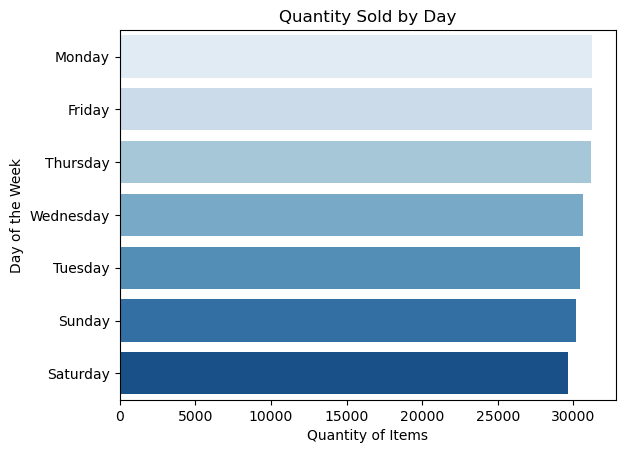

In [8]:
# I illustrate the data by using a column chart to have a better visual understanding of the sales.
sns.barplot(y='Week Day', x='Transaction Quantity', data=quantity_per_day_of_week, palette='Blues')
plt.title('Quantity Sold by Day')
plt.xlabel('Quantity of Items')
plt.ylabel('Day of the Week')
plt.show()

In [9]:
# I can go a step further and analyze which period of the day the most items were sold in.
# I add a new column named 'Time Period' with 3 distinct values.
# Each value represents a certain time period of the day.
df['Time Period'] = df['Transaction Time'].apply(lambda x: 'morning' if 6 <= x.hour < 12 else ('afternoon' if 12 <= x.hour < 18 else 'evening'))

# Then I group the total quantity of items by week day and time period and display the new dataframe.
quantity_by_day_and_period = df.groupby(['Week Day', 'Time Period'])['Transaction Quantity'].sum().sort_values(ascending=False).reset_index()
quantity_by_day_and_period

,Week Day,Time Period,Transaction Quantity
0,Friday,morning,17446
1,Tuesday,morning,17245
2,Monday,morning,16902
3,Wednesday,morning,16806
4,Sunday,morning,16626
5,Thursday,morning,16566
6,Saturday,morning,16038
7,Thursday,afternoon,11529
8,Monday,afternoon,11454
9,Wednesday,afternoon,10895


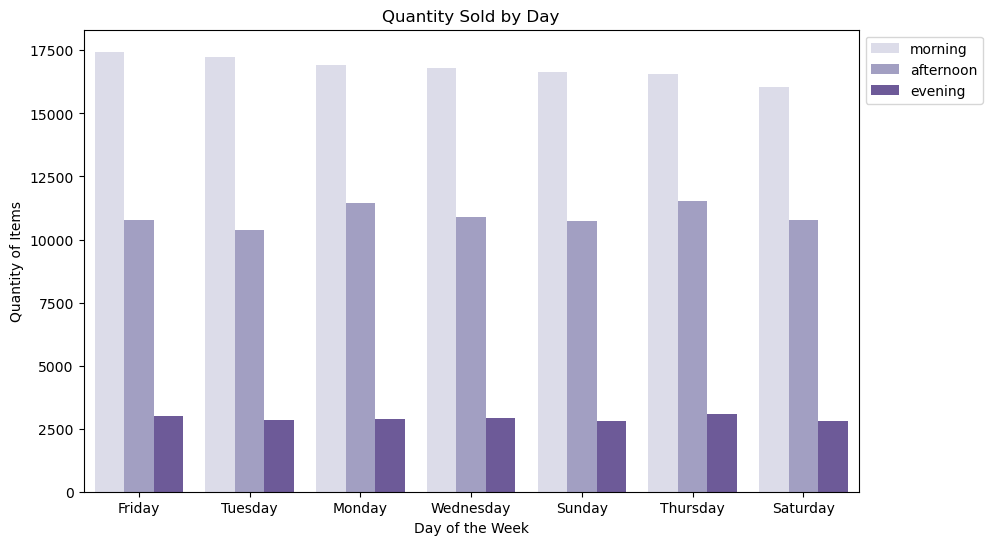

The barplot demonstrates that the most quantity of items was sold on Fridays in the morning hours.


In [10]:
# In order to get a better visual understanding of this data, I create a barplot.
plt.figure(figsize=(10, 6))
sns.barplot(x='Week Day', y='Transaction Quantity', hue='Time Period', data=quantity_by_day_and_period, palette='Purples')
plt.title('Quantity Sold by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Quantity of Items')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
print('The barplot demonstrates that the most quantity of items was sold on Fridays in the morning hours.')

#### 2. Which month were the most items sold in?

In [11]:
# To answer the question, I calculate the total sum of transaction quantities for each month, and then
# sort them in a descending order.
df['Month'] = df['Transaction Date'].dt.month_name()
quantity_per_month = df.groupby('Month')['Transaction Quantity'].sum().sort_values(ascending=False).reset_index()
print(quantity_per_month)
print(f'\nThe most items were sold in {quantity_per_month.iloc[0,0]}')

      Month  Transaction Quantity
0      June                 50942
1       May                 48233
2     April                 36469
3     March                 30406
4   January                 24870
5  February                 23550

The most items were sold in June


#### 3. Where were the largest quantities of items sold?

In [12]:
# I repeat the same process, but I group based on store location.

quantity_by_location = df.groupby(df['Store Location'])['Transaction Quantity'].sum().sort_values(ascending=False).reset_index()
print(quantity_by_location)
print(f'\nThe most items were sold in {quantity_by_location.iloc[0,0]}')

    Store Location  Transaction Quantity
0  Lower Manhattan                 71742
1   Hell's Kitchen                 71737
2          Astoria                 70991

The most items were sold in Lower Manhattan


#### 4. What was the best selling product during each period of the day?

In [13]:
# To answer this question, first I filter the rows for each specific period of the day,
# then I sum up the quantities sold for each product type and I display the index ID for the most
# quantities sold. (In this case the index is going to be the product name, since I used the .groupby
# method and consequently the grouped column 'Product Type' became the index of the Series.
morning_best_selling_product = df.loc[df['Time Period'] == 'morning'].groupby('Product Type')['Transaction Quantity'].sum().idxmax()
afternoon_best_selling_product = df.loc[df['Time Period'] == 'afternoon'].groupby('Product Type')['Transaction Quantity'].sum().idxmax()
evening_best_selling_product = df.loc[df['Time Period'] == 'evening'].groupby('Product Type')['Transaction Quantity'].sum().idxmax()
print(f'The best selling product during the morning is {morning_best_selling_product}')
print(f'The best selling product during the morning is {afternoon_best_selling_product}')
print(f'The best selling product during the morning is {evening_best_selling_product}')

The best selling product during the morning is Brewed Chai tea
The best selling product during the morning is Gourmet brewed coffee
The best selling product during the morning is Brewed Chai tea


In [14]:
# Another way to find the best selling product across each period of the day
# is by aggregating the data and using the window function .rank().
best_selling_product_by_time_period = df.groupby(['Time Period', 'Product Type'])['Transaction Quantity'].sum().reset_index()
best_selling_product_by_time_period['Ranked'] = best_selling_product_by_time_period.groupby('Time Period')['Transaction Quantity'].rank(method='dense', ascending=False)
best_selling_product_by_time_period.loc[best_selling_product_by_time_period['Ranked'] == 1, ['Time Period', 'Product Type',	'Transaction Quantity']]

,Time Period,Product Type,Transaction Quantity
13,afternoon,Gourmet brewed coffee,9754
33,evening,Brewed Chai tea,2776
62,morning,Brewed Chai tea,13838


#### 5. Which Products Are the Top Sellers in Terms of Quantity and Revenue?

In [15]:
### First I add a new column that calculates the revenue.
df['Revenue'] = df['Transaction Quantity'] * df['Unit Price']

In [16]:
### Then I aggregate the data based on total quantity and total revenue per product type.
grouped_df = df.groupby(['Product Category', 'Product Type'])[['Transaction Quantity', 'Revenue']].sum()

### Then I sort the revenue in a descending order to see what product type brought in the most revenue.
top_5_by_revenue = grouped_df.sort_values(ascending=False, by=['Revenue']).iloc[:5, :].reset_index()
print('The top sellers in terms of revenue are:')
top_5_by_revenue

The top sellers in terms of revenue are:


,Product Category,Product Type,Transaction Quantity,Revenue
0,Coffee,Barista Espresso,24943,91406.20
1,Tea,Brewed Chai tea,26250,77081.95
2,Drinking Chocolate,Hot chocolate,17457,72416.00
3,Coffee,Gourmet brewed coffee,25973,70034.60
4,Tea,Brewed Black tea,17462,47932.00


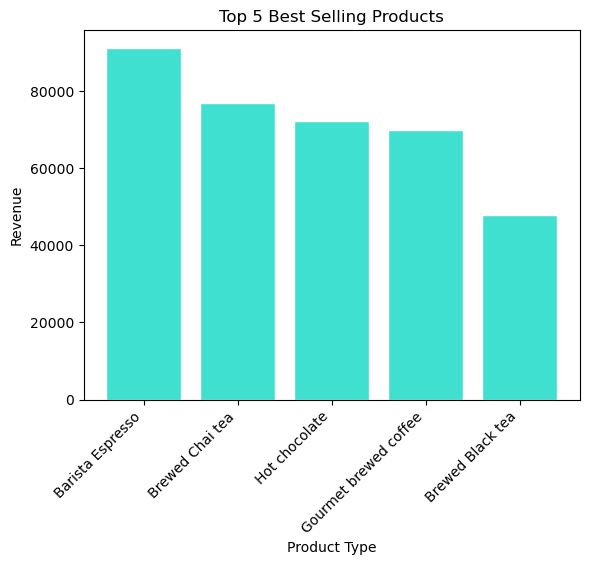

In [17]:
# I illustrate the top 5 best selling products by building a bar chart.
plt.bar(top_5_by_revenue['Product Type'], top_5_by_revenue['Revenue'], color='turquoise', edgecolor='white')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Best Selling Products')
plt.xlabel('Product Type')
plt.ylabel('Revenue')
plt.show()

In [18]:
### Then I sort the 'transaction_qty' column in a descending order
### to see what product type sold the most in terms of quantity.
top_5_by_quantity = grouped_df.sort_values(ascending=False, by=['Transaction Quantity']).iloc[:5, :].reset_index()
print('The top sellers in terms of quantity are:')
top_5_by_quantity

The top sellers in terms of quantity are:


,Product Category,Product Type,Transaction Quantity,Revenue
0,Tea,Brewed Chai tea,26250,77081.95
1,Coffee,Gourmet brewed coffee,25973,70034.60
2,Coffee,Barista Espresso,24943,91406.20
3,Tea,Brewed Black tea,17462,47932.00
4,Drinking Chocolate,Hot chocolate,17457,72416.00


#### 6. How did the sales perform across different locations?

In [19]:
# In order to see how the sales performed across different locations,
# I aggregate the data based on total quantity and total revenue per store location.
grouped_df2 = df.groupby(['Store Location', 'Store ID'])[['Transaction Quantity', 'Revenue']].sum()

# Then I order the total revenue in a descending order.
total_revenue_by_location_desc = grouped_df2.sort_values(by='Revenue', ascending=False).reset_index()
total_revenue_by_location_desc

,Store Location,Store ID,Transaction Quantity,Revenue
0,Hell's Kitchen,8,71737,236511.17
1,Astoria,3,70991,232243.91
2,Lower Manhattan,5,71742,230057.25


In [27]:
# I can also visualize my results by plotting a donut chart.
plot1 = px.pie(names=total_revenue_by_location_desc['Store Location'],
values=total_revenue_by_location_desc['Revenue'],
title="Generated Revenue by Store Location",
hole=0.6,
color=total_revenue_by_location_desc['Store Location'],
color_discrete_map={'Lower Manhattan':'royalblue',
                    'Astoria':'darkblue',
                    'Hell\'s Kitchen': 'cyan'})
plot1.show()

In [21]:
# Now I order the total transaction quantity in a descending order.
total_quantity_by_location_desc = grouped_df2.sort_values(by='Transaction Quantity', ascending=False).reset_index()
total_quantity_by_location_desc

,Store Location,Store ID,Transaction Quantity,Revenue
0,Lower Manhattan,5,71742,230057.25
1,Hell's Kitchen,8,71737,236511.17
2,Astoria,3,70991,232243.91


In [25]:
# I visualize my insights using a pie chart.
plot2 = px.pie(names=total_quantity_by_location_desc['Store Location'],
values=total_quantity_by_location_desc['Transaction Quantity'],
title="Quantity Sold by Store Location",
color=total_quantity_by_location_desc['Store Location'],
color_discrete_map={'Lower Manhattan':'57c87d',
                    'Astoria':'15f661',
                    'Hell\'s Kitchen': '2e9952'})
plot2.show()

#### 7. What are the overall sale trends over time?

In [28]:
# Finally, I want to calculate how much revenue was generated over time per product category.
# In order to be able to illustrate the months in a chronological order, 
# I convert the 'Months' column from type object into type category.
months_chronological = ['January', 'February', 'March', 'April', 'May', 'June']
df['Month'] = pd.Categorical(df['Month'], categories=months_chronological, ordered=True)

# Then I aggregate my total revenue per month and product category.
revenue_per_month = df.groupby(['Month','Product Category'])['Revenue'].sum().reset_index().sort_values('Month')
print(revenue_per_month)

# I illustrate the results with a trend line graph.
plot3 = px.line(revenue_per_month, 
              x='Month', 
              y='Revenue', 
              color='Product Category',
              title='Revenue Trend by Product Category',
              markers=True
             )
plot3.show()

       Month    Product Category   Revenue
0    January              Bakery   9535.75
1    January             Branded   1890.00
2    January              Coffee  31256.85
3    January        Coffee beans   5245.25
4    January  Drinking Chocolate   8337.75
5    January            Flavours    974.40
6    January           Loose Tea   1293.85
7    January  Packaged Chocolate    521.94
8    January                 Tea  22621.95
17  February                 Tea  21733.40
16  February  Packaged Chocolate    451.02
15  February           Loose Tea   1277.85
14  February            Flavours    930.40
10  February             Branded   1235.00
12  February        Coffee beans   4077.50
11  February              Coffee  29268.95
9   February              Bakery   9038.82
13  February  Drinking Chocolate   8132.25
23     March            Flavours   1172.00
25     March  Packaged Chocolate    588.20
24     March           Loose Tea   1646.95
22     March  Drinking Chocolate  10253.50
26     Marc

None
